In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/train/sql12.csv")

In [3]:
data

,ID,projectname,classification,Abstract,label
0,0,sql12,DEFECT,/**\r\t * TODO: this is a bug in the code at t...,yes
1,1,sql12,DEFECT,// Cast to int required as Dimension::setSize(...,yes
2,2,sql12,DEFECT,/*\r * This won't work on Derby where no...,yes
3,3,sql12,DEFECT,// The following query produces a result that ...,yes
4,4,sql12,DEFECT,// We know this fails - Bug# 1700093,yes
...,...,...,...,...,...
7210,7210,sql12,WITHOUT_CLASSIFICATION,// i18n[SQLResultExecuterPanel.rowsUpdated={0}...,no
7211,7211,sql12,WITHOUT_CLASSIFICATION,// i18n[mmsql.catalogErr=The DBNAME of the ses...,no
7212,7212,sql12,WITHOUT_CLASSIFICATION,/* the constructor above sets this from resour...,no
7213,7213,sql12,WITHOUT_CLASSIFICATION,"/* because of the cross-catalog problem, let's...",no


</h1> Pre- processing for embeddings </h1>

In [4]:
comments=data[['Abstract']]

In [5]:
labels=data[['label']]

In [6]:
labels_list=[]
for i, row in labels.iterrows():
    labels_list.append(row['label'])
    
comments_list=[]
for i, row in comments.iterrows():
    comments_list.append(row['Abstract'])

In [7]:
comments_list

['/**\r\t * TODO: this is a bug in the code at the moment.  If table "test" isn\'t qualified then this test passes - \r\t * so we need to beef up qualified tablename handling.\r\t */',
 "// Cast to int required as Dimension::setSize(double,double) // doesn't appear to do anything in JDK1.2.2.",
 '/*\r       * This won\'t work on Derby where non-varchar columns cannot be altered\r       * among other restrictions.\r       * \r       * TableColumnInfo nullintVC = getVarcharColumn("nullint", true, "defVal",\r       * "A varchar comment"); String alterColTypeSQL =\r       * dialect.getColumnTypeAlterSQL(firstCol, nullintVC); runSQL(session,\r       * alterColTypeSQL);\r       */',
 "// The following query produces a result that should be editable, but it currently isn't",
 '// We know this fails - Bug# 1700093',
 '// installColorsAndFont needs to be run twice. Background and foreground // colors only work if run after the super call but font only works if run // before the super call. May 

In [8]:
labels_list

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
NUM_WORDS=500
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(comments_list)
X = tokenizer.texts_to_sequences(comments_list)
X,l= np.array(X), np.array(labels)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6425 unique tokens.


In [11]:
word_index

{'the': 1,
 'to': 2,
 'i18n': 3,
 '\r': 4,
 'is': 5,
 'in': 6,
 'a': 7,
 'of': 8,
 'this': 9,
 'for': 10,
 'we': 11,
 'sql': 12,
 'that': 13,
 'not': 14,
 'and': 15,
 'file': 16,
 'if': 17,
 'table': 18,
 'see': 19,
 'it': 20,
 'be': 21,
 'data': 22,
 'non': 23,
 'use': 24,
 'javadoc': 25,
 'as': 26,
 'squirrel': 27,
 'null': 28,
 'column': 29,
 'are': 30,
 'with': 31,
 'so': 32,
 'user': 33,
 'sourceforge': 34,
 'net': 35,
 't': 36,
 '0': 37,
 'name': 38,
 'error': 39,
 'type': 40,
 'when': 41,
 'class': 42,
 'value': 43,
 'set': 44,
 'string': 45,
 'create': 46,
 'add': 47,
 'have': 48,
 'from': 49,
 'text': 50,
 'object': 51,
 'new': 52,
 'do': 53,
 'on': 54,
 'no': 55,
 'by': 56,
 'all': 57,
 'default': 58,
 'or': 59,
 'read': 60,
 'need': 61,
 'an': 62,
 'session': 63,
 'only': 64,
 'there': 65,
 'change': 66,
 'methods': 67,
 '1': 68,
 'get': 69,
 'plugin': 70,
 'noi18n': 71,
 'todo': 72,
 'used': 73,
 'settings': 74,
 'one': 75,
 'was': 76,
 'check': 77,
 's': 78,
 'into': 79,
 

In [12]:
len(word_index)

6425

In [13]:
X

array([list([4, 72, 9, 5, 7, 6, 1, 155, 93, 1, 17, 18, 125, 36, 83, 9, 125, 4, 32, 11, 61, 2, 228, 212, 188, 4]),
       list([2, 119, 26, 347, 347, 163, 36, 2, 53, 6, 206, 206]),
       list([4, 9, 36, 240, 54, 115, 23, 87, 112, 21, 159, 4, 4, 241, 4, 7, 480, 45, 4, 411, 63, 4, 4]),
       ...,
       list([1, 489, 9, 49, 84, 11, 20, 1, 38, 8, 1, 128, 16, 15, 221]),
       list([152, 8, 1, 276, 225, 78, 14, 9, 17, 1, 209, 276, 36, 2, 1, 276, 6, 1, 391, 4]),
       list([172, 15, 14, 319])], dtype=object)

In [15]:
l

array([['yes'],
       ['yes'],
       ['yes'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [16]:
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(l)
y=to_categorical(vec)

C:\Users\Ketaki Barde\AnacondaLatest\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
X = pad_sequences(X)

In [19]:
X

array([[  0,   0,   0, ..., 212, 188,   4],
       [  0,   0,   0, ...,   6, 206, 206],
       [  0,   0,   0, ...,  63,   4,   4],
       ...,
       [  0,   0,   0, ...,  16,  15, 221],
       [  0,   0,   0, ...,   1, 391,   4],
       [  0,   0,   0, ...,  15,  14, 319]])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
data = {}
data["X_train"] = X_train
data["X_val"]= X_val
data["y_train"] = y_train
data["y_val"] = y_val
data["tokenizer"] = tokenizer
data["int2label"] =  {0: "no", 1: "yes"}
data["label2int"] = {"no": 0, "yes": 1}
    

In [21]:
data

{'X_train': array([[  0,   0,   0, ...,  13,   7, 148],
        [  0,   0,   0, ...,  57,   1, 289],
        [  0,   0,   0, ...,   2, 272, 333],
        ...,
        [  0,   0,   0, ...,  20,  78, 362],
        [  0,   0,   0, ...,  72,   1, 114],
        [  0,   0,   0, ...,   0,   0,   0]]),
 'X_val': array([[  0,   0,   0, ..., 355,  22,  49],
        [  0,   0,   0, ...,   2,   1, 208],
        [  0,   0,   0, ...,   2,  53, 111],
        ...,
        [  0,   0,   0, ...,   1,   2,  21],
        [  0,   0,   0, ...,  80,  21, 376],
        [  0,   0,   0, ...,  18,  95,   4]]),
 'y_train': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]], dtype=float32),
 'y_val': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 'tokenizer': <keras_preprocessing.text.Tokenizer at 0x242f8d58cc0>,
 'int2label': {0: 'no', 1: 'yes'},
 'label2in

In [22]:
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)

Shape of X train and X validation tensor: (6493, 159) (722, 159)


In [23]:
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of label train and validation tensor: (6493, 2) (722, 2)


In [89]:
#X_train.reshape((-1,1))

array([[   0],
       [   0],
       [   0],
       ...,
       [   0],
       [2141],
       [5627]])

In [90]:
#y_train.reshape((-1,1))

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [24]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [25]:
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [26]:
word_vectors

In [37]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)


In [38]:
#embedding_vector

In [39]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       [-0.21409729,  0.52149236, -0.51163192, ..., -0.00681892,
         1.3918101 , -0.14613578],
       ...,
       [-0.31122464,  0.02614819, -0.78372033, ..., -0.14466124,
         0.26237316,  0.42938099],
       [ 0.11035156,  0.00231934,  0.11621094, ..., -0.265625  ,
         0.16210938,  0.01501465],
       [-0.01843262,  0.078125  , -0.078125  , ..., -0.109375  ,
         0.24316406,  0.00671387]])

In [40]:
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 1


In [41]:
X_train.shape

(6493, 159)

In [42]:
y_train.shape

(6493, 2)

In [43]:
vocabulary_size

500

In [44]:
sequence_length = X_train.shape[1]

In [45]:
sequence_length

159

In [47]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length= sequence_length,
                            trainable=False)

In [54]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate,GlobalMaxPooling1D
from tensorflow.keras.layers import Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers



In [81]:
batch_size = 256 
num_epochs = 8 

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

<h2> Define CNN with simple one convolutional layer and one pooling layer </h2>

In [82]:
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(num_filters, 7, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(num_filters, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(2, activation='sigmoid')) 

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 159, 300)          150000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 153, 64)           134464    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 76, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 70, 64)            28736     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [83]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [84]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, callbacks=callbacks_list, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/8
21/21 - 10s - loss: 0.4931 - accuracy: 0.8881 - val_loss: 0.3351 - val_accuracy: 0.9523
Epoch 2/8
21/21 - 8s - loss: 0.2744 - accuracy: 0.9567 - val_loss: 0.2164 - val_accuracy: 0.9523
Epoch 3/8
21/21 - 8s - loss: 0.1954 - accuracy: 0.9567 - val_loss: 0.1609 - val_accuracy: 0.9523
Epoch 4/8
21/21 - 7s - loss: 0.1611 - accuracy: 0.9567 - val_loss: 0.1446 - val_accuracy: 0.9523
Epoch 5/8
21/21 - 8s - loss: 0.1454 - accuracy: 0.9565 - val_loss: 0.1352 - val_accuracy: 0.9523
Epoch 6/8
21/21 - 8s - loss: 0.1355 - accuracy: 0.9590 - val_loss: 0.1311 - val_accuracy: 0.9523
Epoch 7/8
21/21 - 8s - loss: 0.1240 - accuracy: 0.9605 - val_loss: 0.1217 - val_accuracy: 0.9569
Epoch 8/8
21/21 - 9s - loss: 0.1121 - accuracy: 0.9632 - val_loss: 0.1156 - val_accuracy: 0.9607


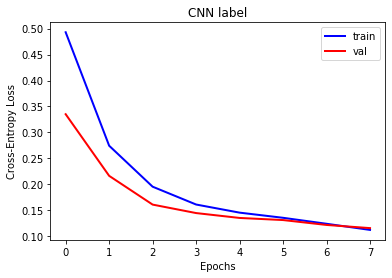

In [85]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN label')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [86]:
hist.history

{'loss': [0.49307405948638916,
  0.2743997275829315,
  0.1954335868358612,
  0.16107934713363647,
  0.14543452858924866,
  0.13548985123634338,
  0.12397965043783188,
  0.11213967949151993],
 'accuracy': [0.8881401419639587,
  0.9566807746887207,
  0.9566807746887207,
  0.9566807746887207,
  0.9564882516860962,
  0.9589911699295044,
  0.9605313539505005,
  0.9632267951965332],
 'val_loss': [0.33511966466903687,
  0.21635214984416962,
  0.16093160212039948,
  0.14460614323616028,
  0.13520479202270508,
  0.1311364769935608,
  0.12171906977891922,
  0.11560989171266556],
 'val_accuracy': [0.9522709846496582,
  0.9522709846496582,
  0.9522709846496582,
  0.9522709846496582,
  0.9522709846496582,
  0.9522709846496582,
  0.9568899273872375,
  0.960739016532898]}

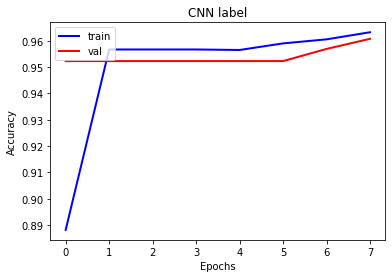

In [87]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN label')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [144]:
def get_predictions(text):
    sequence = data["tokenizer"].texts_to_sequences([text])
    # pad the sequences
    sequence = pad_sequences(sequence, maxlen=sequence_length)
    # get the prediction
    prediction = model.predict(sequence)[0]
    return prediction, data["int2label"][np.argmax(prediction)]

In [145]:
text ="// TODO: check to be sure that the source and destination schemas are // different. Abort if they are the same and inform the user."
output_vector, prediction = get_predictions(text)
print("Output vector:", output_vector)
print("Prediction:", prediction)

Output vector: [0.3971383 0.4995029]
Prediction: yes


In [141]:
test_data=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/test/sql12.csv")

In [142]:
sequences_test=tokenizer.texts_to_sequences(test_data.Abstract.values)
X_test = pad_sequences(sequences_test,maxlen=sequence_length)
y_pred=model.predict(X_test)

In [143]:
pp=y_pred
ll=data["int2label"][np.argmax(prediction)]